In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file='CARS.csv'

In [3]:
# Load the data

In [4]:
car_dataset=pd.read_csv(file)

In [5]:
# Inspect your data

In [6]:
car_dataset.sample(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
245,Mazda,MX-5 Miata convertible 2dr,Sports,Asia,Rear,"$22,388","$20,701",1.8,4.0,142,23,28,2387,89,156
288,Mitsubishi,Outlander LS,SUV,Asia,Front,"$18,892","$17,569",2.4,4.0,160,21,27,3240,103,179
209,Kia,Spectra GS 4dr hatch,Sedan,Asia,Front,"$13,580","$12,830",1.8,4.0,124,24,32,2686,101,178


In [7]:
car_dataset.shape

(428, 15)

In [8]:
car_dataset.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [9]:
# Check for missing data

In [10]:
car_dataset.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [11]:
# Check dataset for duplicates

In [12]:
car_dataset.duplicated().sum()

0

In [13]:
#See a list of all columns

In [14]:
car_dataset.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [15]:
# Styling function for Nan Values

In [16]:
import math

In [17]:
def color_negative_red(value):
    if math.isnan(value):
        color='red'
    else:
        color='black'
    return 'color: %s'% color

In [18]:
car_dataset[car_dataset.Cylinders.isna()].style.applymap(color_negative_red,subset=['Cylinders'])

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.300000,nan,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.300000,nan,238,18,24,3029,106,174


In [19]:
# Information about the dataset

In [20]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [21]:
# Unique values for Cylinders column


In [22]:
car_dataset.Cylinders.nunique()

7

In [23]:
# Cylinders values counts

In [24]:
car_dataset.Cylinders.value_counts()

6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64

In [25]:
#Replace all missing value with median value of column Cylinders

In [26]:
car_dataset['Cylinders']=car_dataset['Cylinders'].fillna(car_dataset['Cylinders'].median())

In [27]:
car_dataset.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [28]:
# Print unique values in each columns to identify categorical data

In [29]:
for item in car_dataset.columns.to_list():
    print(f"{item}:{car_dataset[item].nunique()}")

Make:38
Model:425
Type:6
Origin:3
DriveTrain:3
MSRP:410
Invoice:425
EngineSize:43
Cylinders:7
Horsepower:110
MPG_City:28
MPG_Highway:33
Weight:348
Wheelbase:40
Length:67


In [30]:
# Percentage of types of cars distribution

In [31]:
car_dataset.Type.value_counts(normalize=True).round(2)*100

Sedan     61.0
SUV       14.0
Sports    11.0
Wagon      7.0
Truck      6.0
Hybrid     1.0
Name: Type, dtype: float64

In [32]:
#Convert invoice column to int

In [33]:
def text_to_int(text):
    value_txt=text[1:]
    lst_val=value_txt.split(',')
    return ''.join(lst_val)

In [34]:
car_dataset['Invoice_int']=car_dataset['Invoice'].map(text_to_int).astype(np.float64)

In [35]:
car_dataset['Invoice_int'].sample(3)

339    33011.0
156    14531.0
42     51815.0
Name: Invoice_int, dtype: float64

In [36]:
# Conver MSRP column from string to int

In [37]:
car_dataset['MSRP_int']=car_dataset['MSRP'].map(text_to_int).astype(np.float64)

In [38]:
car_dataset['MSRP_int'].sample(3)


427    35145.0
235    41815.0
201    27905.0
Name: MSRP_int, dtype: float64

## DATA VIZUALIZATION

In [39]:
# Bar chart vizualization of car manufacturer

<AxesSubplot:title={'center':'Car Manufacturer Distribution'}, xlabel='Manufacturer', ylabel='Density'>

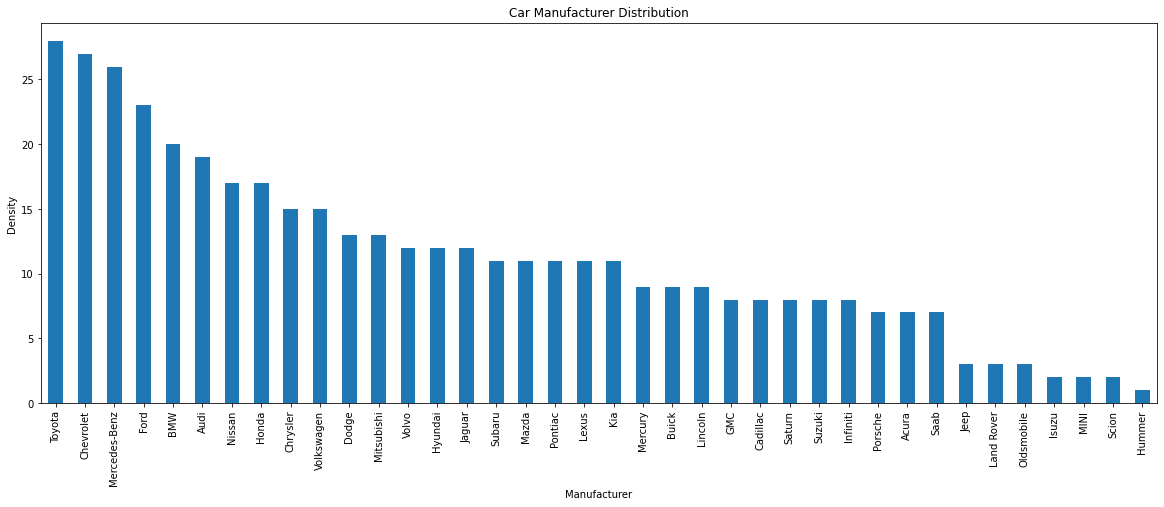

In [40]:
plt.figure(figsize=(20,7))
plt.title('Car Manufacturer Distribution',color='black')
plt.xlabel('Manufacturer')
plt.ylabel('Density')
plt.xticks(rotation=90)
car_dataset['Make'].value_counts().plot(kind='bar')

In [41]:
# Bar Plot Vizualization for Model Distribution

<AxesSubplot:title={'center':'Car Model Distribution'}, xlabel='Model', ylabel='Density'>

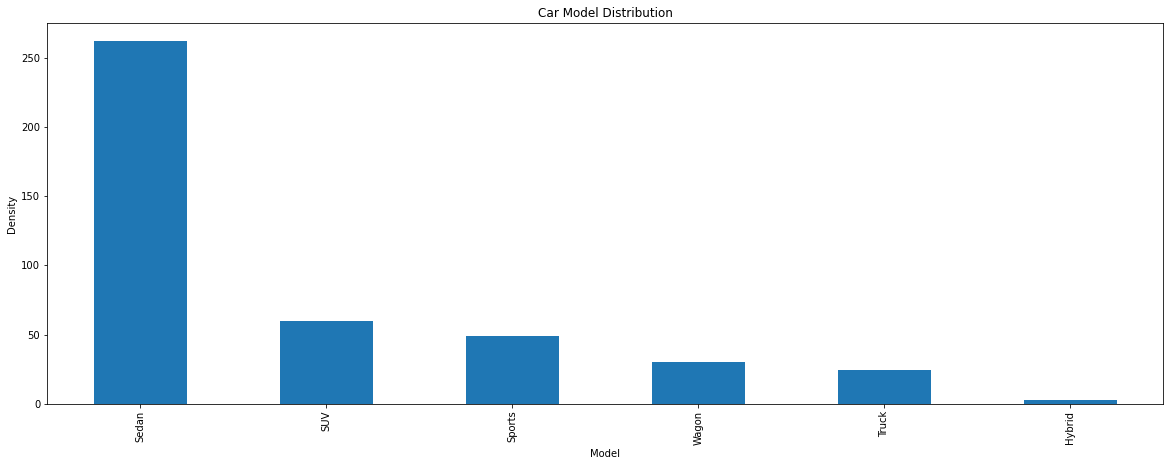

In [42]:
plt.figure(figsize=(20,7))
plt.ylabel('Density')
plt.xlabel('Model')
plt.title('Car Model Distribution')
plt.xticks(rotation=90)
car_dataset.Type.value_counts().plot(kind='bar')

In [43]:
# Pie Chart Vizualization of Car Type Distribution

(-1.1146873903271706,
 1.162841594887205,
 -1.1118998771761928,
 1.129950750552631)

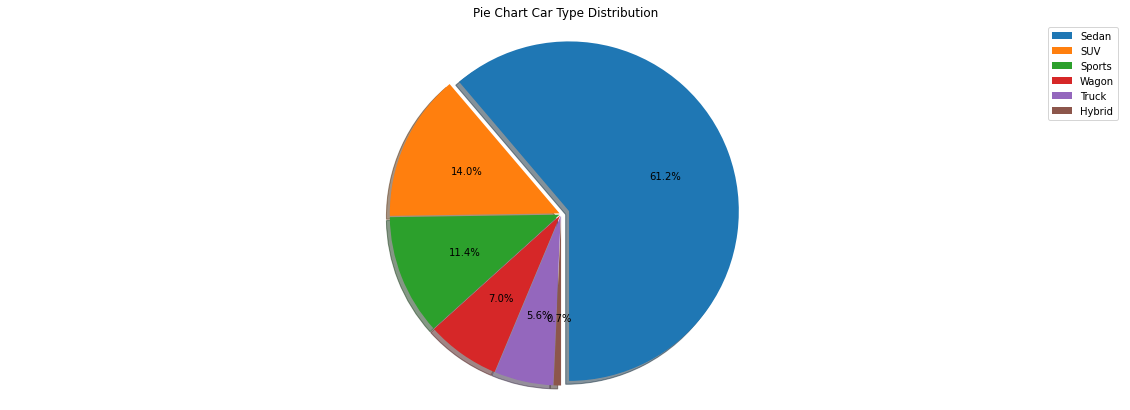

In [44]:
plt.figure(figsize=(20,7))
labels=[x for x in car_dataset.Type.value_counts().sort_values(ascending=False).index]
my_explode=[0.05 if ind == 0 else 0.01 for ind,x in enumerate(car_dataset.Type.value_counts())]
patches,ax,text=plt.pie(car_dataset.Type.value_counts().sort_values(ascending=False),autopct='%1.1f%%',shadow=True,startangle=270,explode=my_explode)
plt.title('Pie Chart Car Type Distribution')
plt.legend(patches,labels,loc='best')
plt.axis('equal')

In [45]:
# Bar chart for Continent of Origin

<AxesSubplot:title={'center':'Continent of Origin Density'}, xlabel='Country', ylabel='Density'>

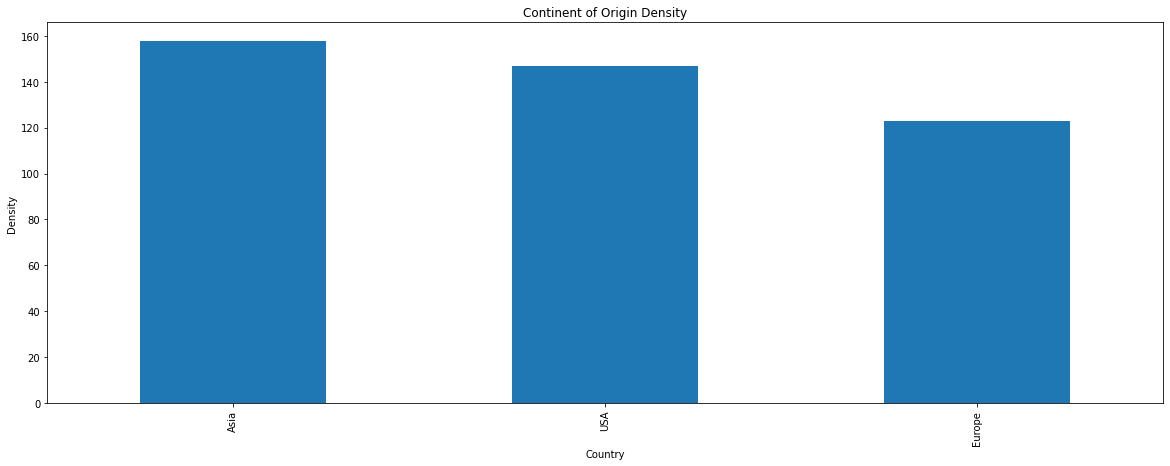

In [46]:
plt.figure(figsize=(20,7))
plt.xlabel('Country')
plt.ylabel('Density')
plt.title('Continent of Origin Density')
plt.xticks(rotation=90)
car_dataset.Origin.value_counts().sort_values(ascending=False).plot(kind='bar')

In [47]:
# Pie Chart for Continet of Origin

(-1.1278966895869829,
 1.139901995898452,
 -1.114631700746221,
 1.1347376357268717)

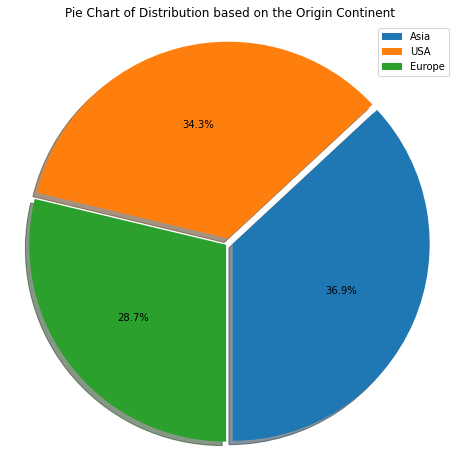

In [48]:
plt.figure(figsize=(8,8))
labels=[x for x in car_dataset.Origin.value_counts().sort_values(ascending=False).index]
my_explode=[0.02 for ind,x in enumerate(car_dataset.Origin.value_counts())]
patches,ax,text=plt.pie(car_dataset.Origin.value_counts().sort_values(ascending=False),shadow=True,autopct='%1.1f%%',startangle=270,explode=my_explode)
plt.legend(patches,labels,loc='best')
plt.title('Pie Chart of Distribution based on the Origin Continent')
plt.axis('equal')

In [49]:
# Bar chart for vizualization of distribution between MSRP and Car Type

<AxesSubplot:title={'center':'Corelation between MSRP and Car Type'}, xlabel='Type', ylabel='MSRP_int'>

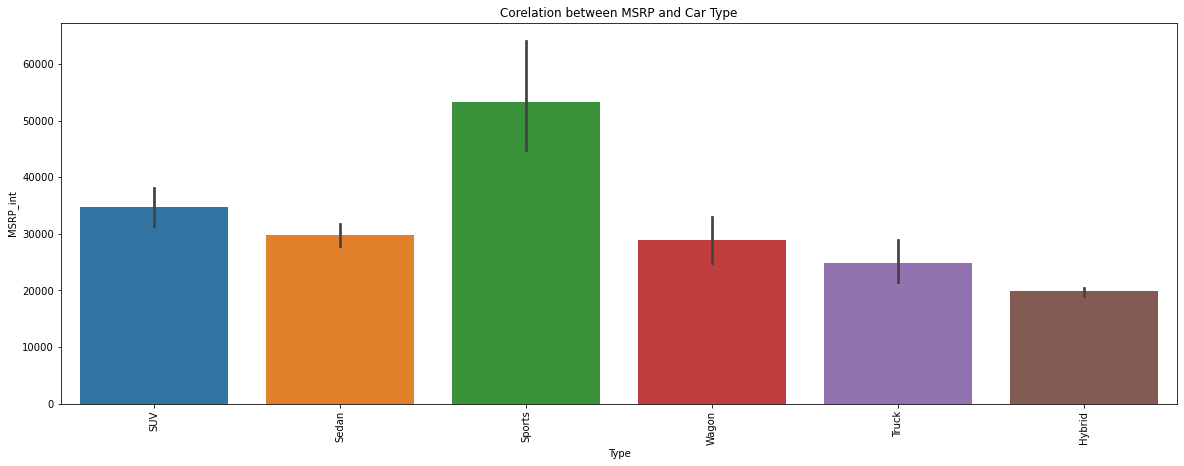

In [50]:
plt.figure(figsize=(20,7))
plt.xlabel('Car Type')
plt.ylabel('MSRP')
plt.xticks(rotation=90)
plt.title('Corelation between MSRP and Car Type')
sns.barplot(x=car_dataset['Type'],y=car_dataset['MSRP_int'])

In [51]:
# Bar Vizualization of Corelation between Car Type and Miles Per Galon (city)

<AxesSubplot:title={'center':'Corelation Between Car Type and Consumption(MPG)'}, xlabel='Type', ylabel='MPG_City'>

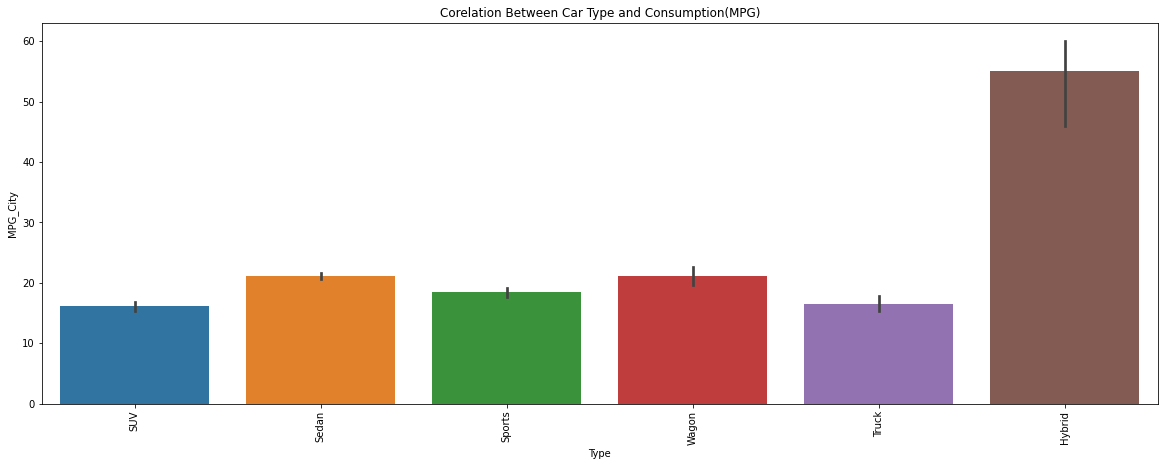

In [52]:
plt.figure(figsize=(20,7))
plt.xlabel('Car Type')
plt.ylabel('MPG-City')
plt.title('Corelation Between Car Type and Consumption(MPG)')
plt.xticks(rotation=90)
sns.barplot(x=car_dataset['Type'],y=car_dataset['MPG_City'])

In [53]:
# Distribution Of Lenght

<AxesSubplot:xlabel='Lenght', ylabel='Density'>

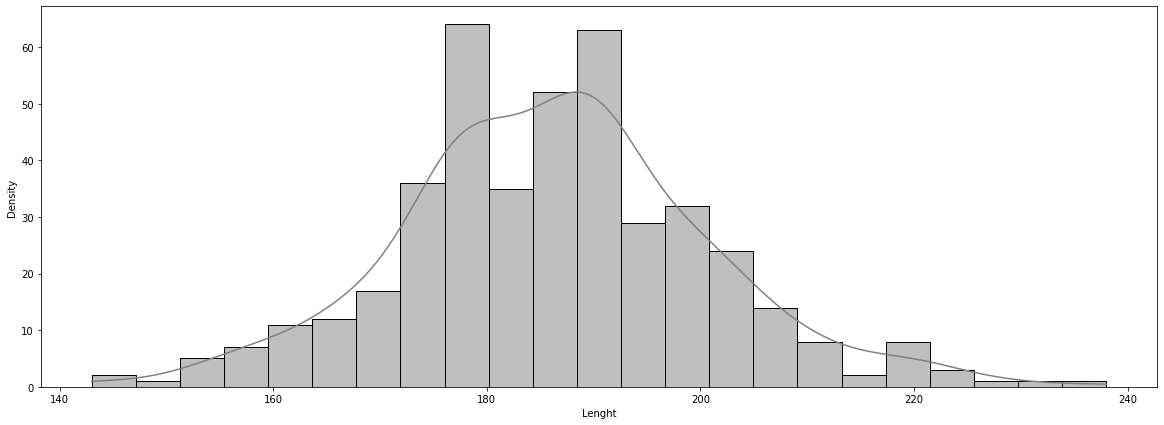

In [54]:
plt.figure(figsize=(20,7))
plt.xlabel('Lenght')
plt.ylabel('Density')
sns.histplot(car_dataset.Length,kde=True,color='grey')

In [55]:
# Vizualization if Weight Distribution

<AxesSubplot:title={'center':'Distribution based on Weight'}, xlabel='Weight', ylabel='Density'>

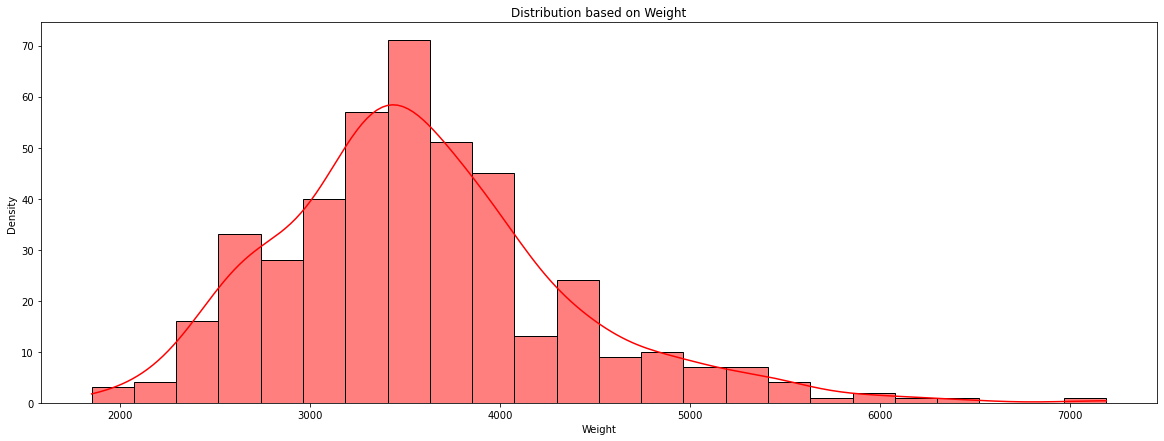

In [56]:
plt.figure(figsize=(20,7))
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Distribution based on Weight')
sns.histplot(car_dataset.Weight,kde=True,color='red')

In [57]:
#Scatter Plot Vizualization of Weight & MSRP

<AxesSubplot:title={'center':'Scatter Plot for Weight & MSRP'}, xlabel='Weight', ylabel='MSRP'>

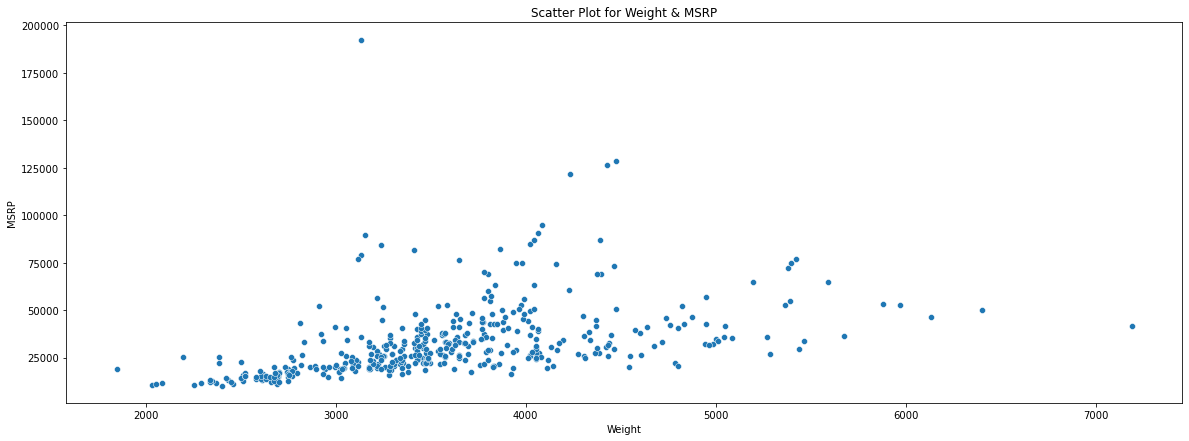

In [58]:
plt.figure(figsize=(20,7))
plt.xlabel('Weight')
plt.ylabel('MSRP')
plt.title('Scatter Plot for Weight & MSRP')
sns.scatterplot(x=car_dataset['Weight'],y=car_dataset['MSRP_int'])

In [59]:
# Scatter Plot Visualization of MSRp & Horsepower & Origin and Type

<AxesSubplot:title={'center':'Scatter PLot for MSRP & Horsepower & Origin and Type'}, xlabel='MSRP', ylabel='Horsepower'>

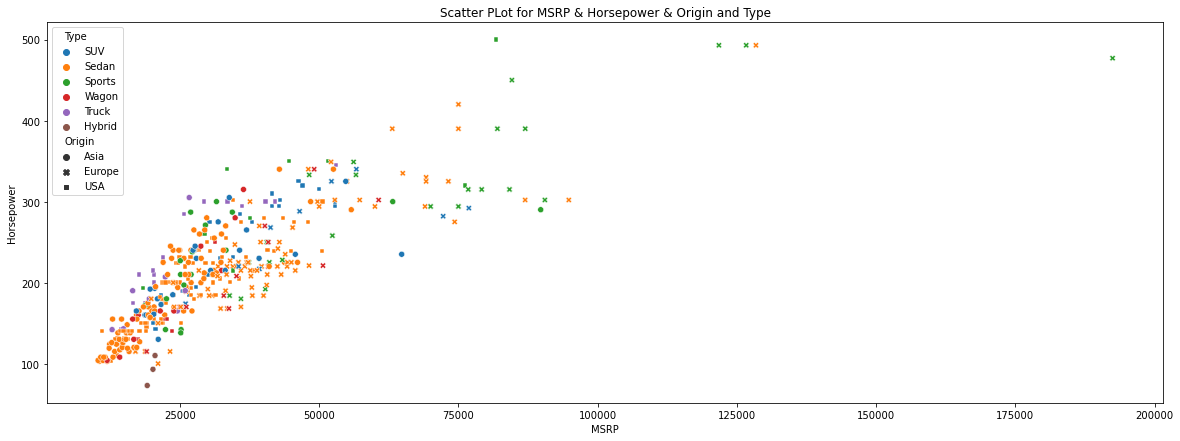

In [60]:
plt.figure(figsize=(20,7))
plt.xlabel('MSRP')
plt.ylabel('Horsepower')
plt.title('Scatter PLot for MSRP & Horsepower & Origin and Type')
sns.scatterplot(x=car_dataset['MSRP_int'],y=car_dataset['Horsepower'],hue=car_dataset['Type'],style=car_dataset.Origin)

In [61]:
# Feature Correlation

<AxesSubplot:title={'center':'Feature Correlation'}>

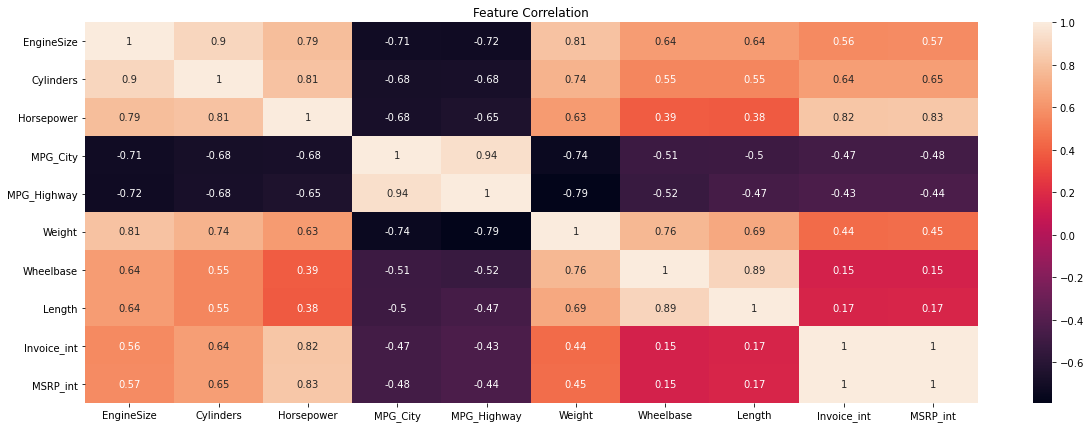

In [62]:
fig,ax=plt.subplots(figsize=(20,7))
plt.title('Feature Correlation')
sns.heatmap(car_dataset.corr(),annot=True)

In [63]:
# observation
# 1. strong correlation between Invoice & MSRP
# 2. strong correlation between MPG_Highway & MPG_City
# 3. strong correlation between EngineSize & Cylinders
# 4. strong correlation between Length & Wheelbase

In [64]:
#Let's drop columns Invoice,MPG_Highway,EngineSize,Lenght

In [65]:
car_dataset.drop(columns=['Invoice','MPG_Highway','EngineSize','Length'],inplace=True)

In [66]:
car_dataset.columns


Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Cylinders',
       'Horsepower', 'MPG_City', 'Weight', 'Wheelbase', 'Invoice_int',
       'MSRP_int'],
      dtype='object')

In [67]:
#Check heatmap for the new dataset with the columns dropped

In [68]:
car_dataset.drop(columns=['Invoice_int'],inplace=True)

In [69]:
car_dataset

,Make,Model,Type,Origin,DriveTrain,MSRP,Cylinders,Horsepower,MPG_City,Weight,Wheelbase,MSRP_int
0,Acura,MDX,SUV,Asia,All,"$36,945",6.0,265,17,4451,106,36945.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",4.0,200,24,2778,101,23820.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990",4.0,200,22,3230,105,26990.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195",6.0,270,20,3575,108,33195.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755",6.0,225,18,3880,115,43755.0
...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565",5.0,197,21,3450,105,40565.0
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565",5.0,242,20,3450,105,42565.0
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210",6.0,268,19,3653,110,45210.0
426,Volvo,V40,Wagon,Europe,Front,"$26,135",4.0,170,22,2822,101,26135.0


<AxesSubplot:title={'center':'Heatmap Dropped Columns'}>

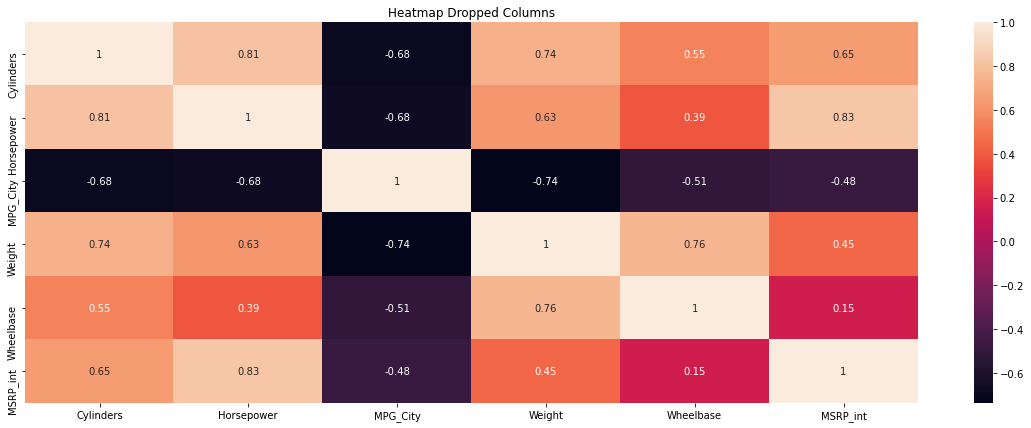

In [70]:
fig,ax=plt.subplots(figsize=(20,7))
plt.title('Heatmap Dropped Columns')
sns.heatmap(car_dataset.corr(),annot=True)

In [71]:
# Catplot Grapgh Visualization for Origin,Type,DriveTrain

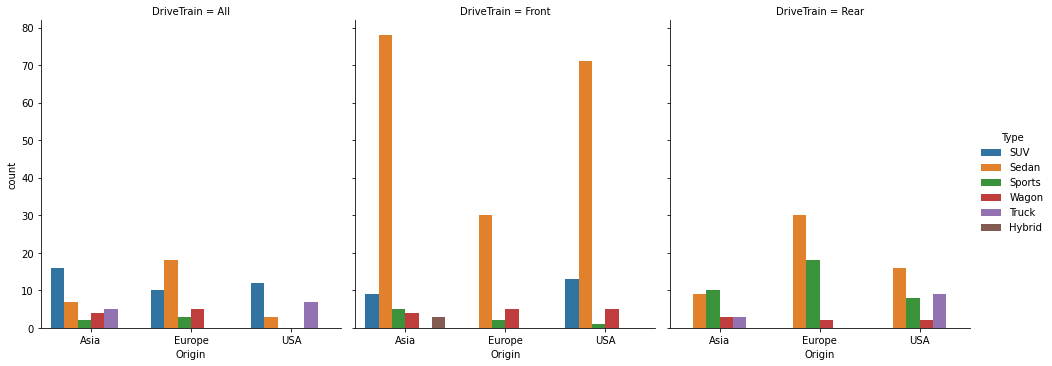

In [72]:
sns.catplot(x='Origin',hue='Type',col='DriveTrain',data=car_dataset,kind='count',height=5,aspect=0.9)

In [73]:
# CountPlot Group by Origin and DriveTrain DIstribution

<AxesSubplot:title={'center':'Origin and DriveTrain Distribution'}, xlabel='Origin', ylabel='count'>

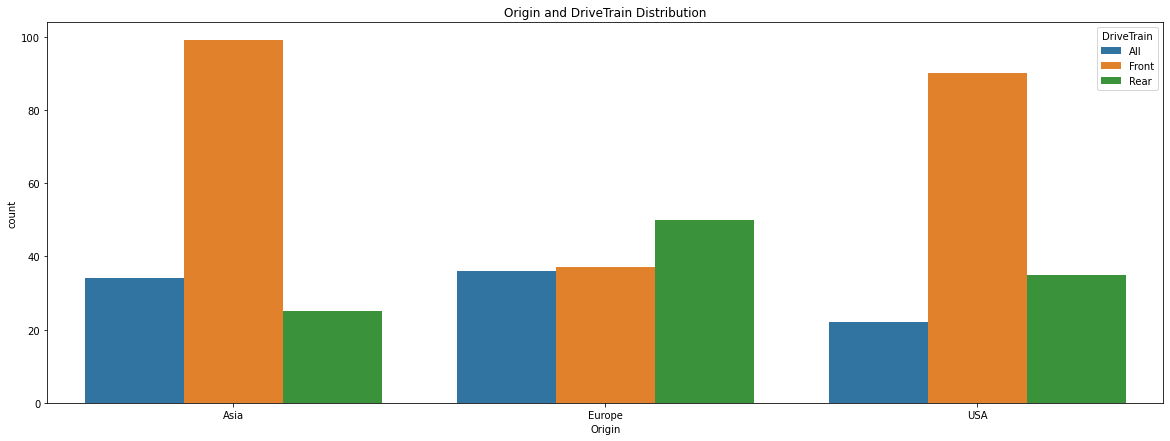

In [74]:
plt.figure(figsize=(20,7))
plt.title('Origin and DriveTrain Distribution')
sns.countplot(x=car_dataset.Origin,hue=car_dataset.DriveTrain)

In [75]:
# Weight displot Visuzalization

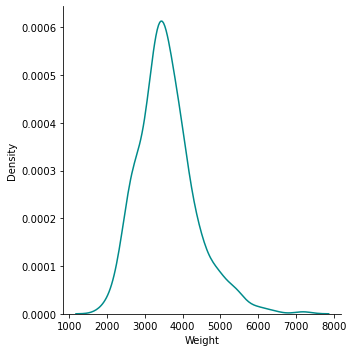

In [76]:
sns.displot(car_dataset.Weight,color='darkcyan',kind='kde')

In [77]:
# MPG_City displot Visualization

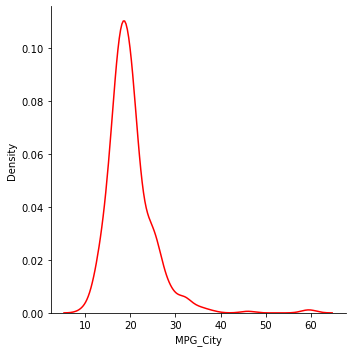

In [78]:
sns.displot(car_dataset['MPG_City'],color='red',kind='kde')

In [79]:
# MSRP and Origin displot visualization

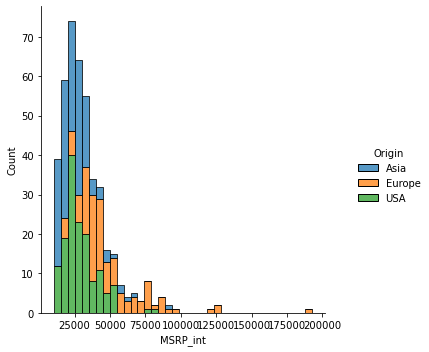

In [80]:
sns.displot(x=car_dataset['MSRP_int'],hue=car_dataset.Origin,multiple='stack')

In [81]:
# MSRP Boxplot mainly used for feature oytlier detection

<AxesSubplot:title={'center':'MSRP Column Box Plot'}, xlabel='MSRP_int'>

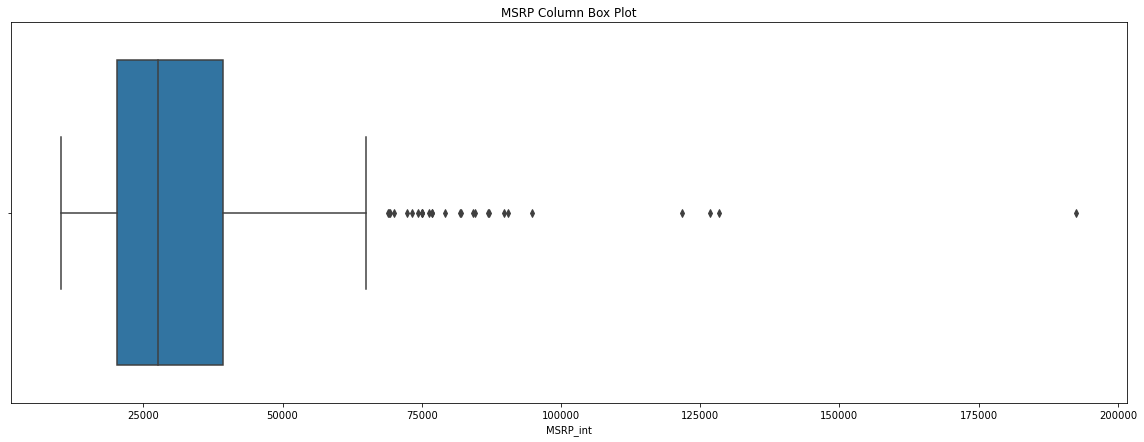

In [82]:
plt.figure(figsize=(20,7))
plt.title('MSRP Column Box Plot')
sns.boxplot(x=car_dataset.MSRP_int)

In [83]:
# MSRP and Type Box Plot Visualization

<AxesSubplot:title={'center':'Box Plot for MSRP and Type'}, xlabel='MSRP_int', ylabel='Type'>

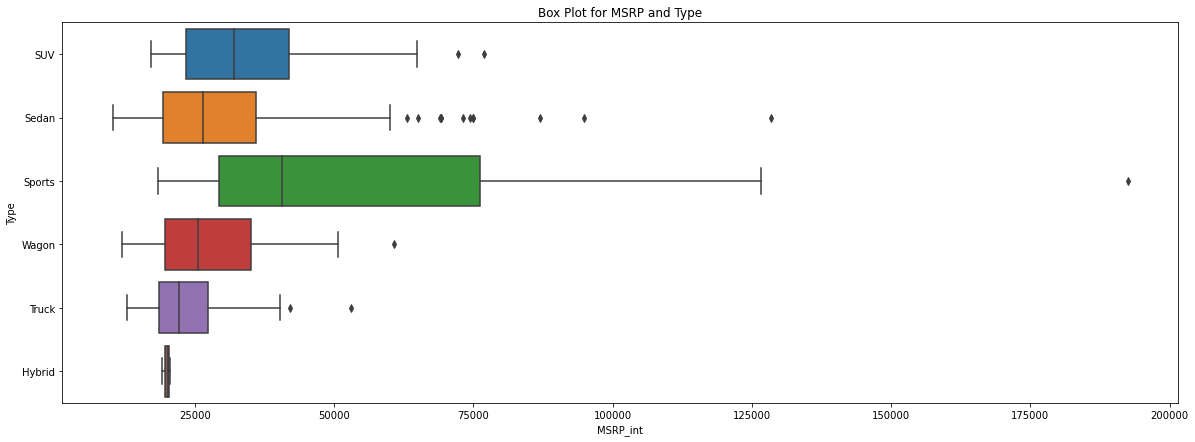

In [85]:
plt.figure(figsize=(20,7))
plt.title('Box Plot for MSRP and Type')
sns.boxplot(x='MSRP_int',y='Type',data=car_dataset)

In [86]:
# Origin ,MSRP and Type Box Plot

<AxesSubplot:title={'center':'Origin,MSRP and Type Box Plot'}, xlabel='Origin', ylabel='MSRP_int'>

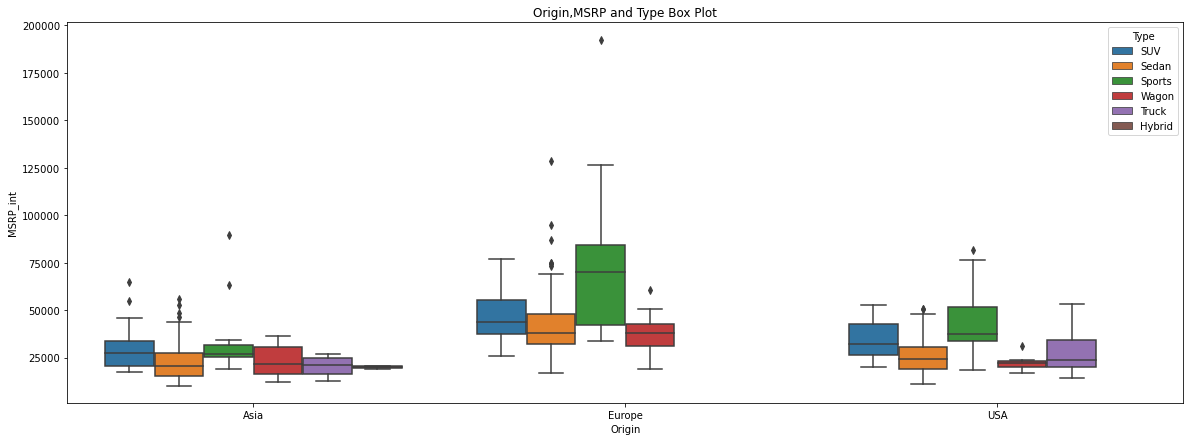

In [87]:
plt.figure(figsize=(20,7))
plt.title('Origin,MSRP and Type Box Plot')
sns.boxplot(x='Origin',y='MSRP_int',hue='Type',data=car_dataset)

In [90]:
car_dataset.DriveTrain.value_counts()

Front    226
Rear     110
All       92
Name: DriveTrain, dtype: int64

In [91]:
#Catplot for Origin,Type ,MSRP and DriveTrain

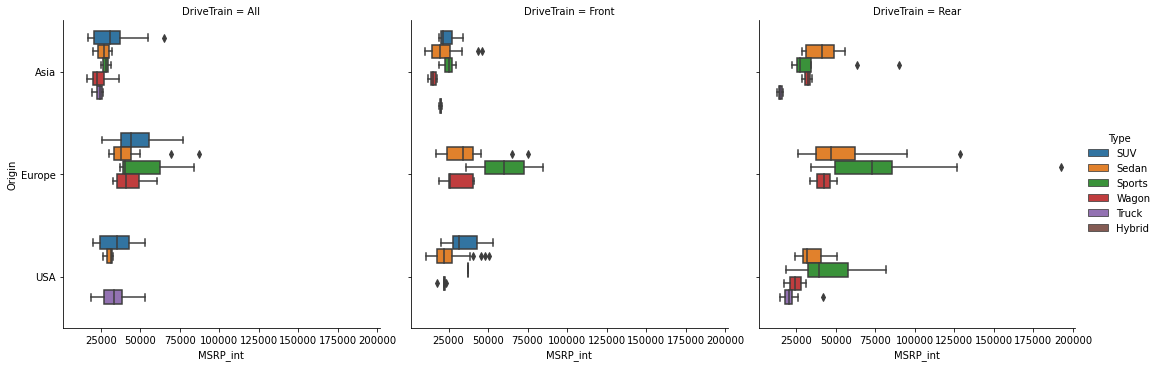

In [96]:

sns.catplot(x='MSRP_int',y='Origin',hue='Type',col='DriveTrain',data=car_dataset,kind='box')

In [97]:
# Visualization for top 10 companies 

<AxesSubplot:title={'center':'Top 10 Companies'}, ylabel='Make'>

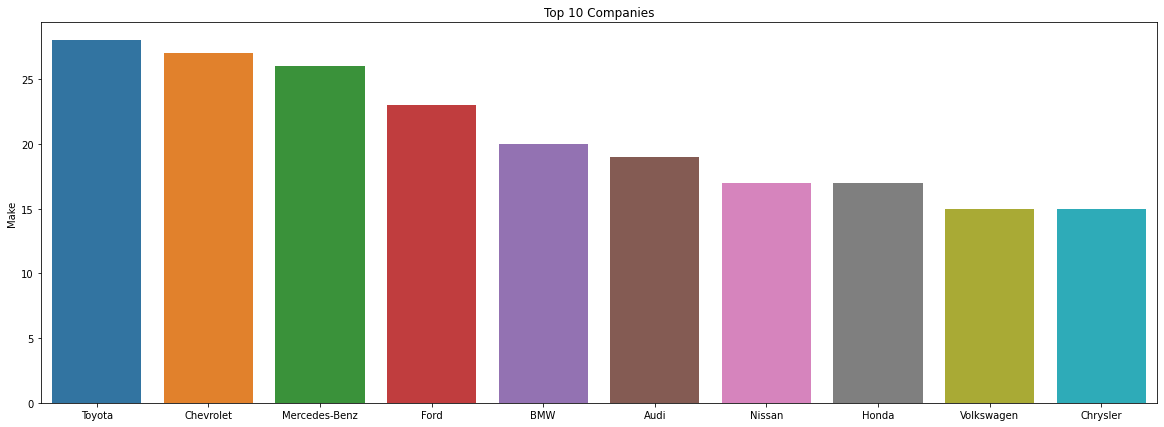

In [99]:
fig,ax=plt.subplots(figsize=(20,7))
plt.title('Top 10 Companies')
sns.barplot(x=car_dataset['Make'].value_counts().sort_values(ascending=False)[:10].index,y=car_dataset['Make'].value_counts().sort_values(ascending=False)[:10])

In [100]:
# Pairplot

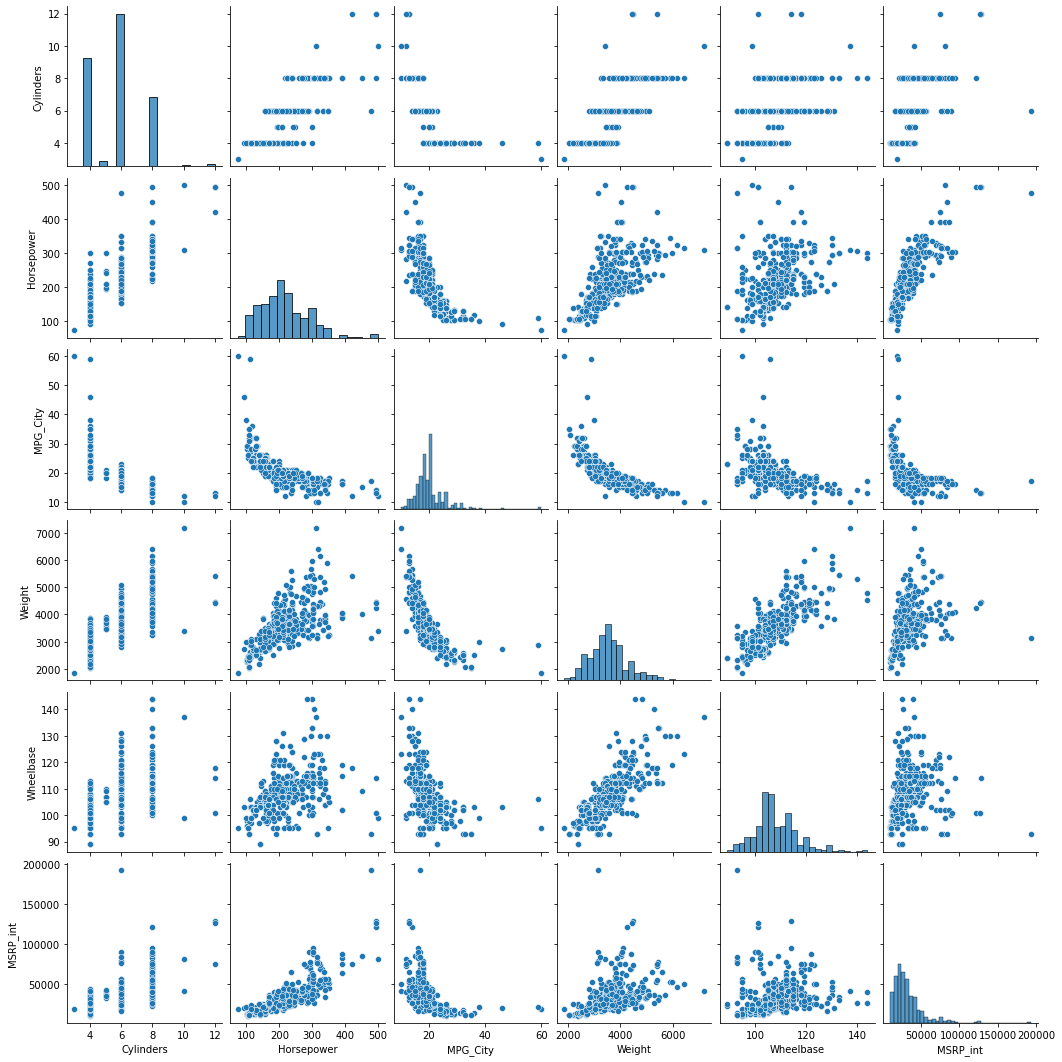

In [101]:
sns.pairplot(car_dataset)

In [129]:
# Using fPlotly to display histograms

In [137]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [138]:
import plotly.express as px

In [140]:
fig=px.histogram(car_dataset,x='Make',color='Origin',labels={'Make':'Manufacturer'},title='Make of the car VS Location')
fig.show()
